In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load Data
df = pd.read_csv(r"C:\Users\Radhika Patil\Downloads\synthetic_sip_dataset.csv")

In [6]:
df

,User_ID,Fund_ID,Fund_Name,SIP_Start_Date,SIP_Amount,NAV_on_Date,Execution_Date,Units_Credited,Expense_Ratio,Category,Feedback_Score,Modified_Flag,Cancelled_Flag
0,U7119,F850,ICICI Prudential Value Discovery,2023-02-05,3000,38.93,2023-02-06,77.061,1.43,Small Cap,8,0,0
1,U7675,F235,Nippon India Small Cap,2023-09-02,2500,24.50,2023-09-07,102.041,1.28,ELSS,9,1,0
2,U6930,F189,HDFC Top 100,2023-06-13,1000,88.97,2023-06-20,11.240,1.32,Small Cap,1,1,0
3,U6986,F359,ICICI Prudential Value Discovery,2023-09-25,1500,60.72,2023-09-28,24.704,0.84,ELSS,9,0,0
4,U9959,F818,ICICI Prudential Value Discovery,2024-05-24,500,86.20,2024-05-27,5.800,2.18,Mid Cap,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,U5833,F707,HDFC Top 100,2024-03-17,500,77.04,2024-03-24,6.490,0.70,ELSS,5,1,1
496,U2262,F600,Mirae Asset Emerging Bluechip,2024-09-30,1500,66.89,2024-10-05,22.425,1.90,Mid Cap,2,0,0
497,U8367,F813,ICICI Prudential Value Discovery,2024-01-13,500,95.96,2024-01-20,5.211,0.76,Balanced,1,1,0
498,U7933,F613,Mirae Asset Emerging Bluechip,2024-08-17,2500,51.05,2024-08-17,48.972,0.77,ELSS,4,1,1


In [7]:
# Handle missing values
df.dropna(subset=['SIP_Start_Date', 'Execution_Date', 'SIP_Amount', 'Feedback_Score'], inplace=True)

In [8]:
df.columns

Index(['User_ID', 'Fund_ID', 'Fund_Name', 'SIP_Start_Date', 'SIP_Amount',
       'NAV_on_Date', 'Execution_Date', 'Units_Credited', 'Expense_Ratio',
       'Category', 'Feedback_Score', 'Modified_Flag', 'Cancelled_Flag'],
      dtype='object')

In [9]:
df.isnull().sum()

User_ID           0
Fund_ID           0
Fund_Name         0
SIP_Start_Date    0
SIP_Amount        0
NAV_on_Date       0
Execution_Date    0
Units_Credited    0
Expense_Ratio     0
Category          0
Feedback_Score    0
Modified_Flag     0
Cancelled_Flag    0
dtype: int64

In [10]:
df.describe()

,SIP_Amount,NAV_on_Date,Units_Credited,Expense_Ratio,Feedback_Score,Modified_Flag,Cancelled_Flag
count,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,1741.000000,55.84018,44.957976,1.567560,5.53000,0.490000,0.256000
std,863.081003,26.55563,43.628558,0.560752,2.80014,0.500401,0.436859
min,500.000000,10.30000,5.007000,0.510000,1.00000,0.000000,0.000000
25%,1000.000000,31.96000,18.024500,1.080000,3.00000,0.000000,0.000000
50%,2000.000000,56.28500,31.755000,1.610000,6.00000,0.000000,0.000000
75%,2500.000000,78.96000,52.385250,2.040000,8.00000,1.000000,1.000000
max,3000.000000,99.86000,277.521000,2.490000,10.00000,1.000000,1.000000


In [11]:
df.dtypes

User_ID            object
Fund_ID            object
Fund_Name          object
SIP_Start_Date     object
SIP_Amount          int64
NAV_on_Date       float64
Execution_Date     object
Units_Credited    float64
Expense_Ratio     float64
Category           object
Feedback_Score      int64
Modified_Flag       int64
Cancelled_Flag      int64
dtype: object

In [12]:
# Convert date fields
df['SIP_Start_Date'] = pd.to_datetime(df['SIP_Start_Date'])
df['Execution_Date'] = pd.to_datetime(df['Execution_Date'])

In [13]:
df.dtypes

User_ID                   object
Fund_ID                   object
Fund_Name                 object
SIP_Start_Date    datetime64[ns]
SIP_Amount                 int64
NAV_on_Date              float64
Execution_Date    datetime64[ns]
Units_Credited           float64
Expense_Ratio            float64
Category                  object
Feedback_Score             int64
Modified_Flag              int64
Cancelled_Flag             int64
dtype: object

### TAT_Days is the count of days between the due date and date of units credited 

In [14]:
# Add turnaround time
df['TAT_Days'] = (df['Execution_Date'] - df['SIP_Start_Date']).dt.days

In [15]:
df['TAT_Days']

0      1
1      5
2      7
3      3
4      3
      ..
495    7
496    5
497    7
498    0
499    0
Name: TAT_Days, Length: 500, dtype: int64

#### the lesser the TAT_Days, the better the customer experience leading to improved retention rate

In [16]:
# Cancellation distribution
print(df['Cancelled_Flag'].value_counts())

Cancelled_Flag
0    372
1    128
Name: count, dtype: int64


In [17]:
100 * df['Cancelled_Flag'].value_counts()/df.shape[0]

Cancelled_Flag
0    74.4
1    25.6
Name: count, dtype: float64

### Findings 

##### 74.4% users cancelled their SIP's due to less customer satisfaction rate 

##### 25.6% of users cancelled their SIPs

### Define User Tier based on SIP_Amount quantiles
#### Create 3 tiers: 'Low', 'Medium', 'High'

In [18]:
df['User_Tier'] = pd.qcut(df['SIP_Amount'], q=3, labels=['Low', 'Medium', 'High'])

In [19]:
df['User_Tier'] 

0        High
1      Medium
2         Low
3         Low
4         Low
        ...  
495       Low
496       Low
497       Low
498    Medium
499    Medium
Name: User_Tier, Length: 500, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [20]:
# Ensure Modified_Flag and Cancelled_Flag are treated as boolean/categorical for plots
df['Modified_Flag'] = df['Modified_Flag'].astype(bool)
df['Cancelled_Flag'] = df['Cancelled_Flag'].astype(bool)

In [23]:
print("--- Data Preprocessing Complete ---")
df.head()

--- Data Preprocessing Complete ---


,User_ID,Fund_ID,Fund_Name,SIP_Start_Date,SIP_Amount,NAV_on_Date,Execution_Date,Units_Credited,Expense_Ratio,Category,Feedback_Score,Modified_Flag,Cancelled_Flag,TAT_Days,User_Tier
0,U7119,F850,ICICI Prudential Value Discovery,2023-02-05,3000,38.93,2023-02-06,77.061,1.43,Small Cap,8,False,False,1,High
1,U7675,F235,Nippon India Small Cap,2023-09-02,2500,24.50,2023-09-07,102.041,1.28,ELSS,9,True,False,5,Medium
2,U6930,F189,HDFC Top 100,2023-06-13,1000,88.97,2023-06-20,11.240,1.32,Small Cap,1,True,False,7,Low
3,U6986,F359,ICICI Prudential Value Discovery,2023-09-25,1500,60.72,2023-09-28,24.704,0.84,ELSS,9,False,False,3,Low
4,U9959,F818,ICICI Prudential Value Discovery,2024-05-24,500,86.20,2024-05-27,5.800,2.18,Mid Cap,2,False,False,3,Low


In [26]:
print("\nDescriptive Statistics for TAT_Days:")
df['TAT_Days'].describe()


Descriptive Statistics for TAT_Days:


count    500.000000
mean       3.040000
std        2.410398
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max        7.000000
Name: TAT_Days, dtype: float64

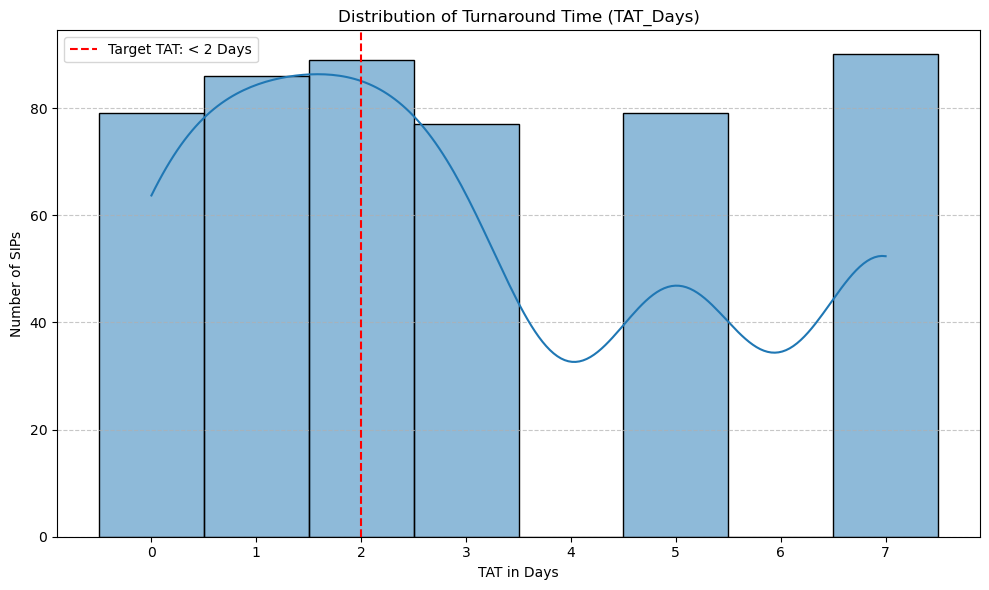

In [29]:
# --- 1. Turnaround Time (TAT) Distribution ---

# 1.1 Histogram: Distribution of TAT_Days
plt.figure(figsize=(10, 6))
sns.histplot(df['TAT_Days'], bins=np.arange(df['TAT_Days'].min(), df['TAT_Days'].max() + 1.5) - 0.5, kde=True)
plt.axvline(x=2, color='r', linestyle='--', label='Target TAT: < 2 Days')
plt.title('Distribution of Turnaround Time (TAT_Days)')
plt.xlabel('TAT in Days')
plt.ylabel('Number of SIPs')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

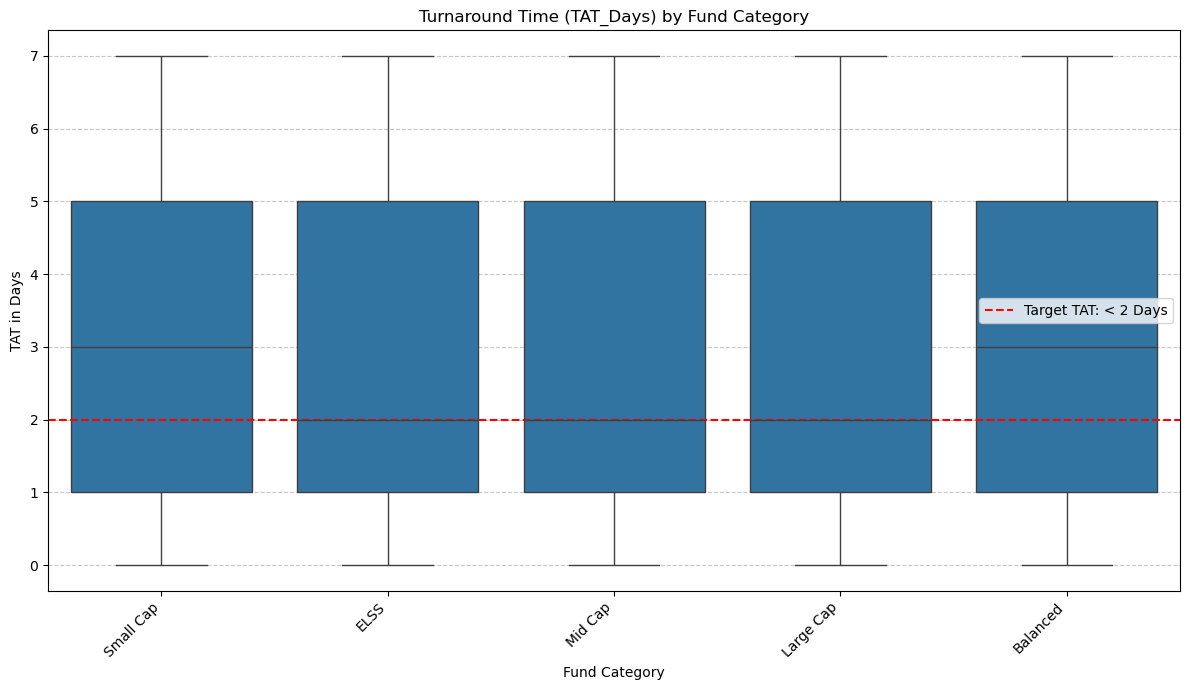

In [32]:
# 1.2 Box Plot: TAT_Days by Fund Category
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Category', y='TAT_Days')
plt.axhline(y=2, color='r', linestyle='--', label='Target TAT: < 2 Days')
plt.title('Turnaround Time (TAT_Days) by Fund Category')
plt.xlabel('Fund Category')
plt.ylabel('TAT in Days')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Radhika Patil\AppData\Local\Temp\ipykernel_27796\2478119462.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='User_Tier', y='TAT_Days', order=['Low', 'Medium', 'High'], palette='cividis')


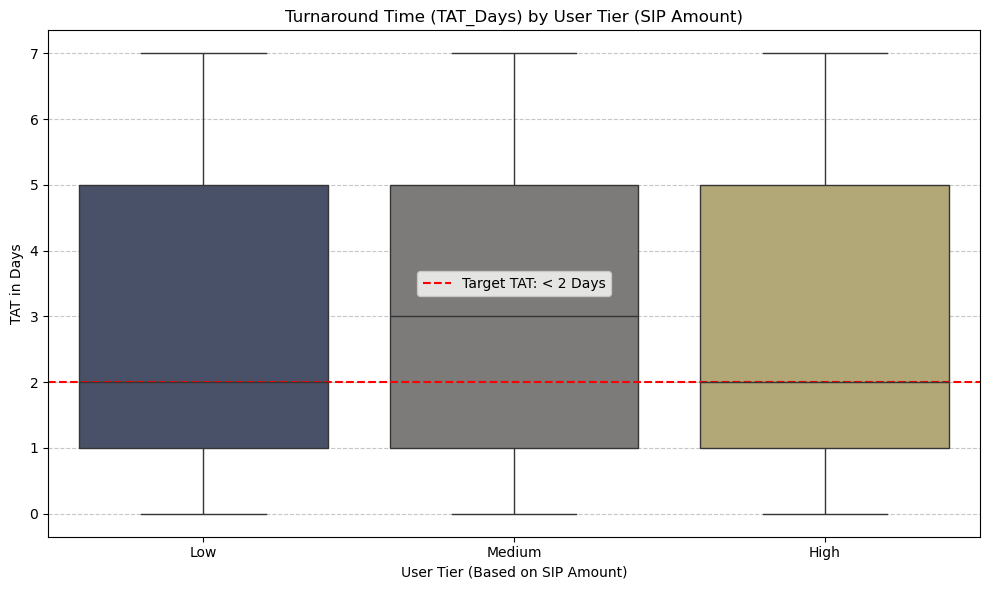

In [33]:
# 1.3 Box Plot: TAT_Days by User Tier (SIP_Amount)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='User_Tier', y='TAT_Days', order=['Low', 'Medium', 'High'], palette='cividis')
plt.axhline(y=2, color='r', linestyle='--', label='Target TAT: < 2 Days')
plt.title('Turnaround Time (TAT_Days) by User Tier (SIP Amount)')
plt.xlabel('User Tier (Based on SIP Amount)')
plt.ylabel('TAT in Days')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

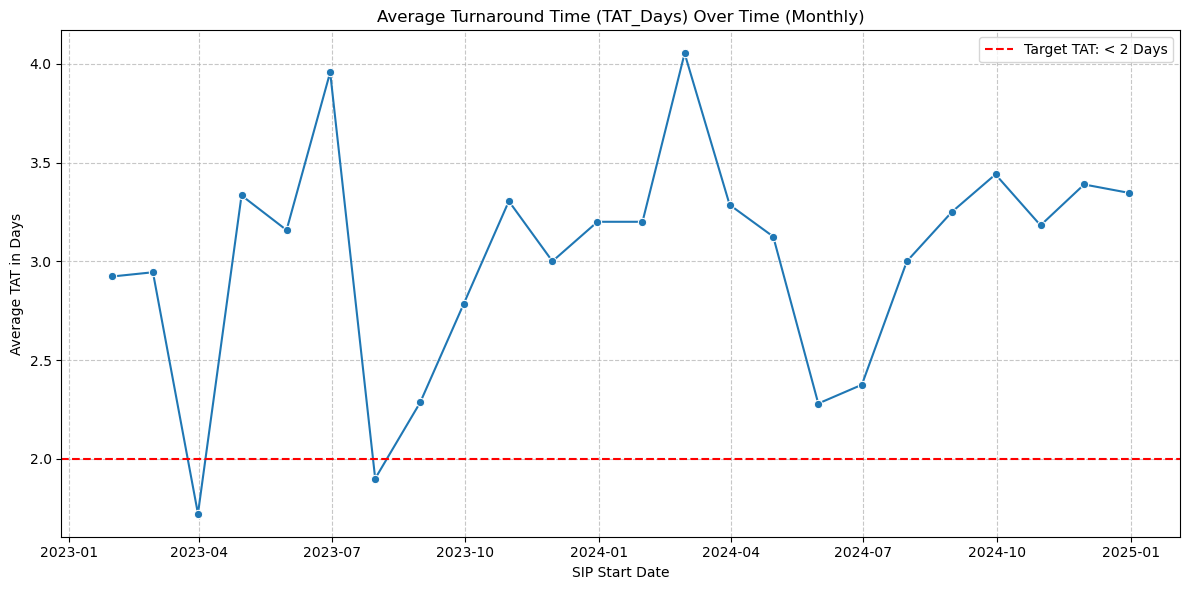

In [36]:
# 1.4 Line Chart: Average TAT_Days over time (monthly)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly_tat, x='SIP_Start_Date', y='TAT_Days', marker='o')
plt.axhline(y=2, color='r', linestyle='--', label='Target TAT: < 2 Days')
plt.title('Average Turnaround Time (TAT_Days) Over Time (Monthly)')
plt.xlabel('SIP Start Date')
plt.ylabel('Average TAT in Days')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

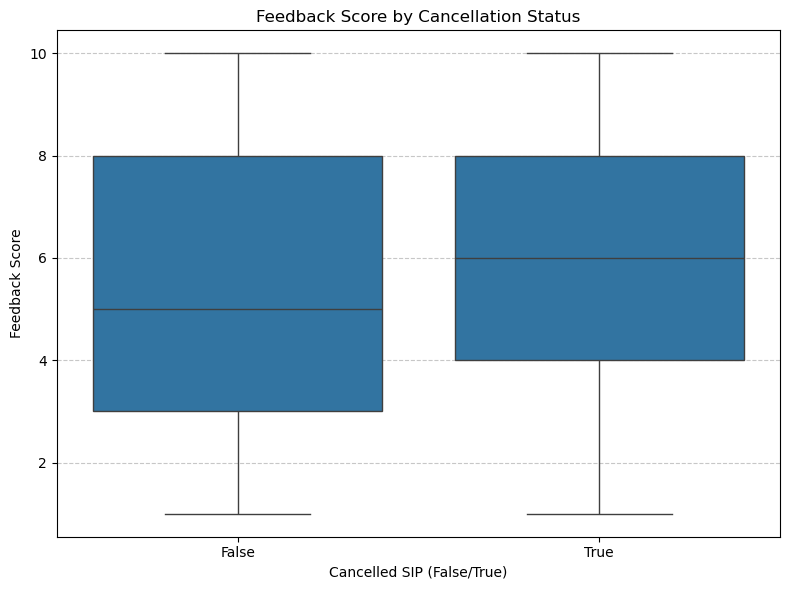

In [41]:
# --- 3. User Sentiment & Feedback ---

# 3.1 Boxplot: Feedback Score by Cancellation Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Cancelled_Flag', y='Feedback_Score')
plt.title('Feedback Score by Cancellation Status')
plt.xlabel('Cancelled SIP (False/True)')
plt.ylabel('Feedback Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


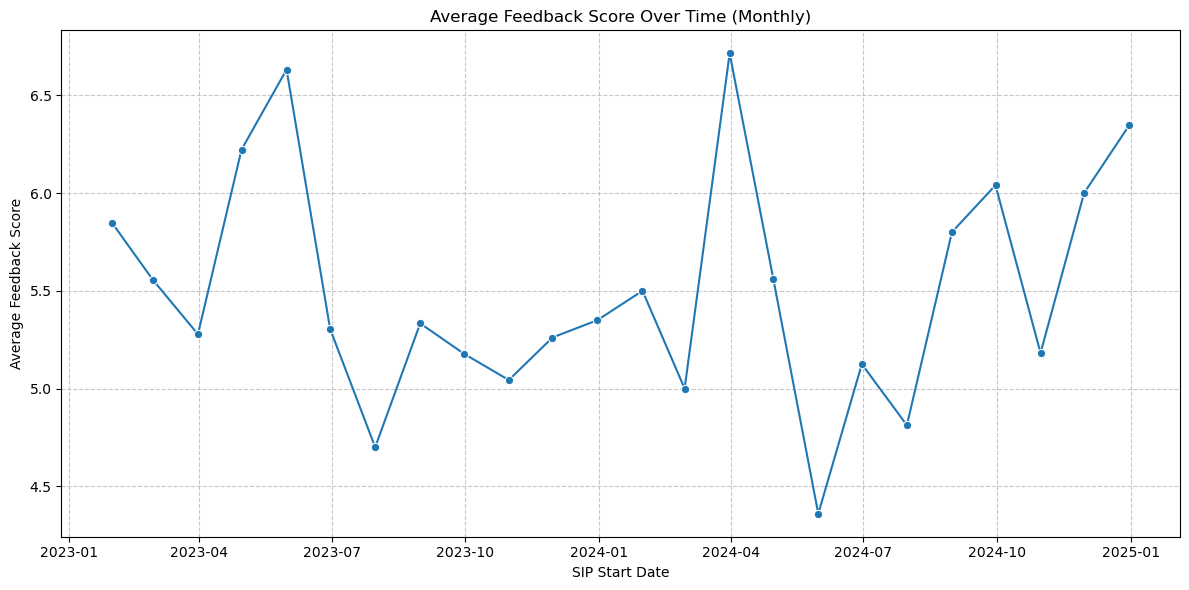

In [43]:
# 3.2 Trend Line: Average Feedback Score over Time (monthly)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly_feedback, x='SIP_Start_Date', y='Feedback_Score', marker='o')
plt.title('Average Feedback Score Over Time (Monthly)')
plt.xlabel('SIP Start Date')
plt.ylabel('Average Feedback Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Radhika Patil\AppData\Local\Temp\ipykernel_27796\2494439388.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_tier_churn = df.groupby('User_Tier')['Cancelled_Flag'].mean().reset_index()


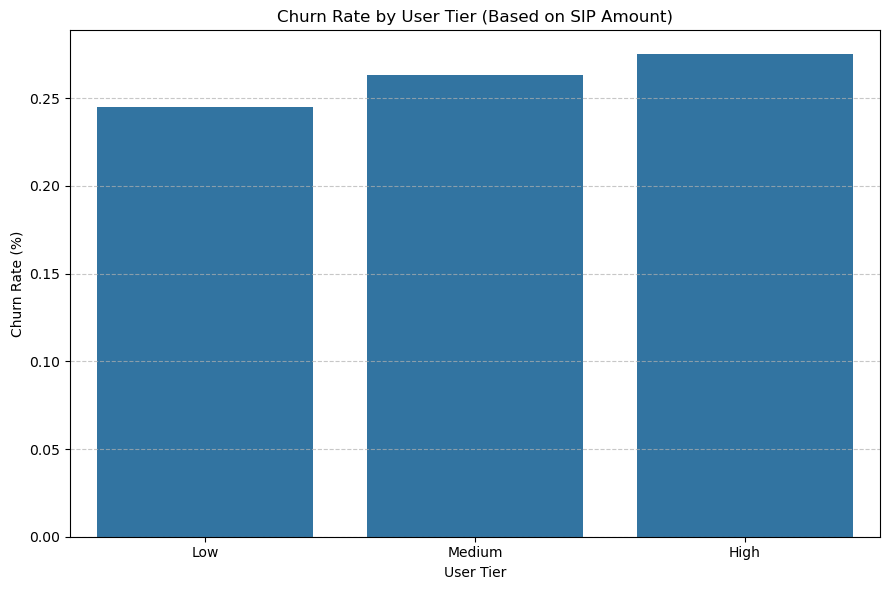

In [48]:
# --- 4. Cohort Analysis ---

# 4.1 Churn Rate by User Tier (SIP Amount bands)
# Churn is represented by Cancelled_Flag = True
user_tier_churn = df.groupby('User_Tier')['Cancelled_Flag'].mean().reset_index()
user_tier_churn.rename(columns={'Cancelled_Flag': 'Churn_Rate'}, inplace=True)

plt.figure(figsize=(9, 6))
sns.barplot(data=user_tier_churn, x='User_Tier', y='Churn_Rate', order=['Low', 'Medium', 'High'])
plt.title('Churn Rate by User Tier (Based on SIP Amount)')
plt.xlabel('User Tier')
plt.ylabel('Churn Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Radhika Patil\AppData\Local\Temp\ipykernel_27796\1626375326.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_tier_feedback = df.groupby('User_Tier')['Feedback_Score'].mean().reset_index()
C:\Users\Radhika Patil\AppData\Local\Temp\ipykernel_27796\1626375326.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=user_tier_feedback, x='User_Tier', y='Feedback_Score', order=['Low', 'Medium', 'High'], palette='plasma')


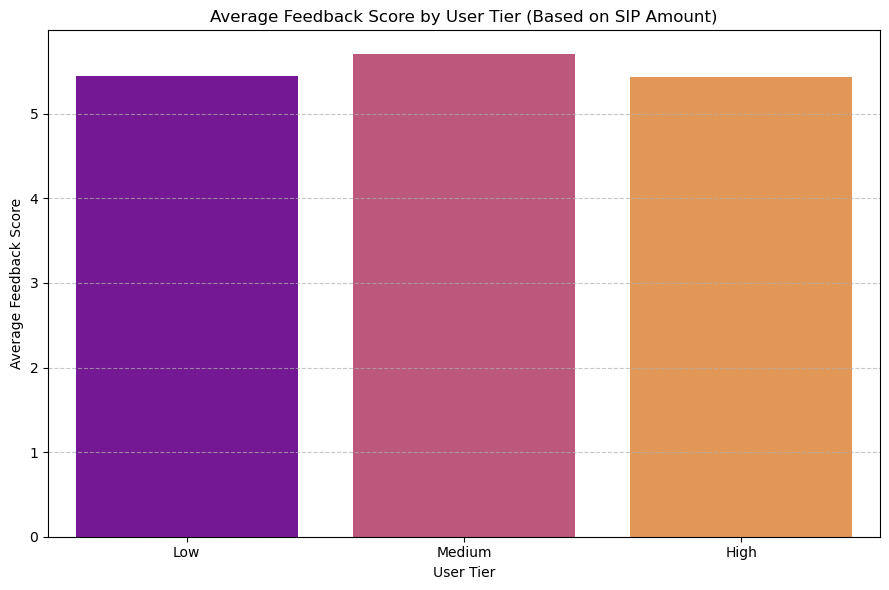

In [49]:
# 4.2 Average Feedback Score by User Tier
user_tier_feedback = df.groupby('User_Tier')['Feedback_Score'].mean().reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(data=user_tier_feedback, x='User_Tier', y='Feedback_Score', order=['Low', 'Medium', 'High'], palette='plasma')
plt.title('Average Feedback Score by User Tier (Based on SIP Amount)')
plt.xlabel('User Tier')
plt.ylabel('Average Feedback Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
